# **Project Name**    -  **Health Insurance Cross Sell Prediction**



##### **Project Type**    - Classification


# **Problem Statement**
##### Our client is an insurance company that has provided Health Insurance to it's customers. now they need your help in building a model to predict whether the policyholders (customers) from the past year will also be interested in Vehicle insurance provided by the company. An insurance policy is an agreement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of a Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance premium will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now, if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalized that year and not everyone.This way everyone shares the risk of everyone else.  
##### Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called 'sum assured') to the customer.
##### Building a model to predict whether a customer would be interested in vehicle insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.
##### Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code), Vehicles(Vehicle age, Damage), Policy (Premium, sourcing channel),etc.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import roc_auc_score, confusion_matrix,f1_score,classification_report,recall_score
from sklearn.model_selection import cross_val_score 

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
df = pd.read_csv('D:\Paython daily class\ML Projects API\Insurance_Cross_github\TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [3]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

### Dataset Rows & Columns count

In [4]:
#Getting the shape of dataset with rows and columns

df.shape

(381109, 12)

### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

**Why is it important to remove duplicate records from my data?** 
* "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.***

In [6]:
# Dataset Duplicate Value Count
dupliates = len(df[df.duplicated()])
print("There are {} duplicate values in dataset".format(dupliates))

There are 0 duplicate values in dataset


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


* ***As we can see above there are no missing value presents thankfully***

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe().T

count           mean            std     min      25%  \
id                    381109.0  190555.000000  110016.836208     1.0  95278.0   
Age                   381109.0      38.822584      15.511611    20.0     25.0   
Driving_License       381109.0       0.997869       0.046110     0.0      1.0   
Region_Code           381109.0      26.388807      13.229888     0.0     15.0   
Previously_Insured    381109.0       0.458210       0.498251     0.0      0.0   
Annual_Premium        381109.0   30564.389581   17213.155057  2630.0  24405.0   
Policy_Sales_Channel  381109.0     112.034295      54.203995     1.0     29.0   
Vintage               381109.0     154.347397      83.671304    10.0     82.0   
Response              381109.0       0.122563       0.327936     0.0      0.0   

                           50%       75%       max  
id                    190555.0  285832.0  381109.0  
Age                       36.0      49.0      85.0  
Driving_License            1.0       1.0       1.0  
Region_Code               28.0      35.0      52.0  
Previously_Insured         0.0       1.0       1.0  
Annual_Premium         31669.0   39400.0  540165.0  
Policy_Sales_Channel     133.0     152.0     163.0  
Vintage                  154.0     227.0     299.0  
Response                   0.0       0.0       1.0

### Variables Description 

#### <b>Attribute Information: </b>

* ##### id : Unique ID for a Customer
* ##### Gender - Male/female
* ##### Age - Age of Cutomer
* ##### Driving Lincese- Customer has DL or not
* ##### Region_Code - Unique code for the region of the customer
* ##### Previously_insured - Customer already has vehicle insurance or not
* ##### Vehicle_age - Age of the vehicle
* ##### Vehicle_damage - past damages present or not
* ##### Annual Premium - amount customer needs to pay as premium
* ##### PolicySalessChannel - Anonymized Code for the channel of outreaching to the customer i.e. Different Agents, Ovver Mail, Over Phone, In Person, etc. 
* ##### Vintage - Number of days, Customer has been associated with the company.
* ##### Response - Customer is interested or not.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
    print("No. of unique values in ",i,"is" ,df[i].nunique(),".")

No. of unique values in  id is 381109 .
No. of unique values in  Gender is 2 .
No. of unique values in  Age is 66 .
No. of unique values in  Driving_License is 2 .
No. of unique values in  Region_Code is 53 .
No. of unique values in  Previously_Insured is 2 .
No. of unique values in  Vehicle_Age is 3 .
No. of unique values in  Vehicle_Damage is 2 .
No. of unique values in  Annual_Premium is 48838 .
No. of unique values in  Policy_Sales_Channel is 155 .
No. of unique values in  Vintage is 290 .
No. of unique values in  Response is 2 .


## 3. ***Data Wrangling***

In [ ]:
df.drop(['id','Region_Code','Policy_Sales_Channel'], axis = 1, inplace = True)

- **The id column consist of unique id for each customer which will not help us to make the right predictions so we drop it.**
- **Region code column consists of unique codes for various region, which shows which customer belongs to which region. But the problem here is that it's a categorical column and it contains 53 different unique codes. So due to the large number of categories of region codes we have to drop this column.**
- **Policy_Sales_Channel contains the values of the anonymized code of outreaching customers such as over call, over mails etc. This also contains 155 unique categories of codes which are quite unclear. So due to lack of information amd unclarity we will drop this column.**

In [ ]:
#Let's take a look at the data after dropping the columns 
df.head()

Gender  Age  Driving_License  Previously_Insured Vehicle_Age  \
0    Male   44                1                   0   > 2 Years   
1    Male   76                1                   0    1-2 Year   
2    Male   47                1                   0   > 2 Years   
3    Male   21                1                   1    < 1 Year   
4  Female   29                1                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Vintage  Response  
0            Yes         40454.0      217         1  
1             No         33536.0      183         0  
2            Yes         38294.0       27         1  
3             No         28619.0      203         0  
4             No         27496.0       39         0

In [ ]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

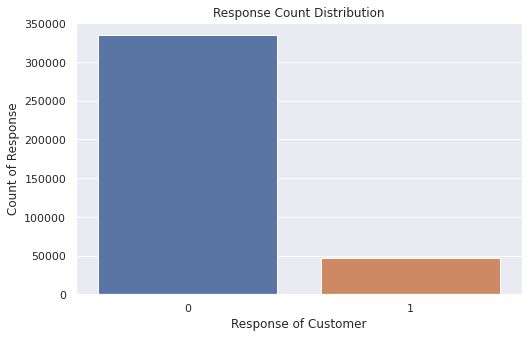

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df , x = 'Response')
plt.xlabel('Response of Customer')
plt.ylabel('Count of Response')
plt.title('Response Count Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

- **As we know, that in "Response" column 1 shows the customers who are intersted in vehicle insurance whereas 0 indicates the customers who aren't interested in vehicle insurance.** 
- **From the above chart we can clearly see that very less number of customers interested in vehicle insurance.** 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

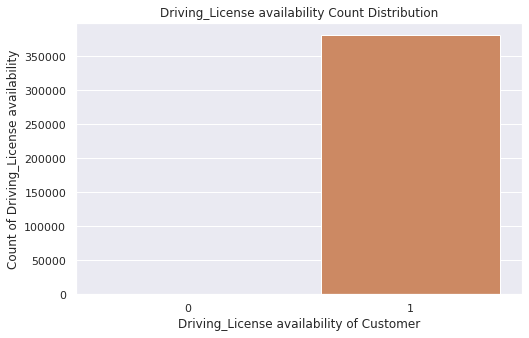

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df , x = 'Driving_License')
plt.xlabel('Driving_License availability of Customer')
plt.ylabel('Count of Driving_License availability')
plt.title('Driving_License availability Count Distribution')
plt.show()

In [ ]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

- **From the above chart we can clearly see that very less number customers who don't have driving license which is nearly about 800+ customers.** 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

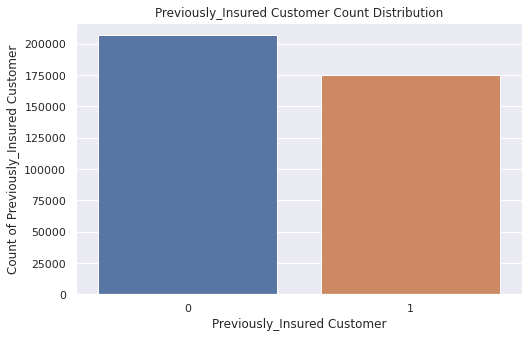

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df , x = 'Previously_Insured')
plt.xlabel('Previously_Insured Customer')
plt.ylabel('Count of Previously_Insured Customer')
plt.title('Previously_Insured Customer Count Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

- **From the above chart we can clearly see that the distribution of previously insured customers is very different from the customer response distribution and it is a big concerns for us as it's clearly stating that customers aren't happy by the previous services.** 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

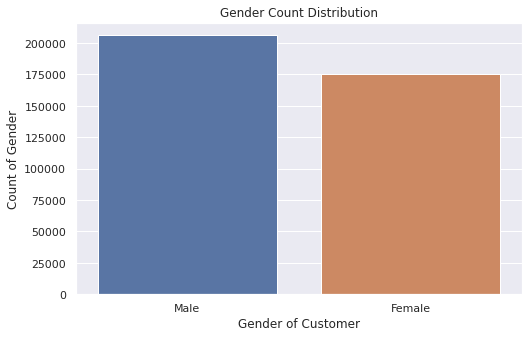

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(data = df , x = 'Gender')
plt.xlabel('Gender of Customer')
plt.ylabel('Count of Gender')
plt.title('Gender Count Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

- **From the chart we can say that the male customer count is more than feamle customer count.** 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In [ ]:
fig = plt.figure(figsize = (8,5))
ax = fig.gca()
ax.axvline(df['Age'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Age'].median(), color='cyan', linestyle='dashed', linewidth=2)
sns.histplot(data = df , x = 'Age')
plt.title('Age Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

- **A histogram is an excellent tool for visualizing and understanding the probabilistic distribution of numerical data or image data that is intuitively understood by almost everyone. Python has a lot of different options for building and plotting histograms.**


##### 2. What is/are the insight(s) found from the chart?

- **The histograms clearly shows that the distribution is right skewed.**
- **What is right skewed data ?** - When the chart's tail is longer on its right side and its peak veers to the left. 
- **It's indication that we have outliers so we will see box plot for age column to get the bettre idea.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In [ ]:
plt.figure(figsize = (9,7))
sns.boxplot(data = df , x = 'Age')
plt.show()

##### 1. Why did you pick the specific chart?

- **Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers..**


##### 2. What is/are the insight(s) found from the chart?

- **As we can clearly see that there are no outliers present in the Age column and the mean and median values are also so very close so no there is no need to worry.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

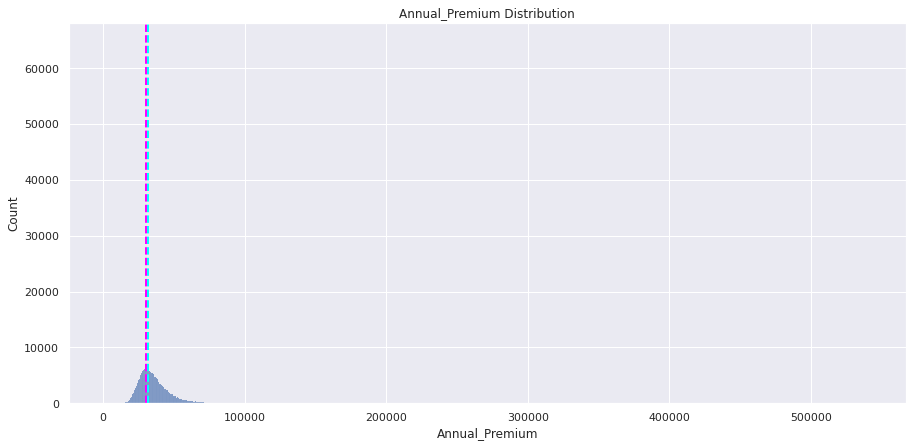

In [ ]:
fig = plt.figure(figsize = (15,7))
ax = fig.gca()
ax.axvline(df['Annual_Premium'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Annual_Premium'].median(), color='cyan', linestyle='dashed', linewidth=2)
sns.histplot(data = df , x = 'Annual_Premium')
plt.title('Annual_Premium Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

- **A histogram is an excellent tool for visualizing and understanding the probabilistic distribution of numerical data or image data that is intuitively understood by almost everyone. Python has a lot of different options for building and plotting histograms.**


##### 2. What is/are the insight(s) found from the chart?

- **From the histogram we can see that the distribution nearly normal distribution but we have to find whether the outliers are present or not so we will plot boxplot.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

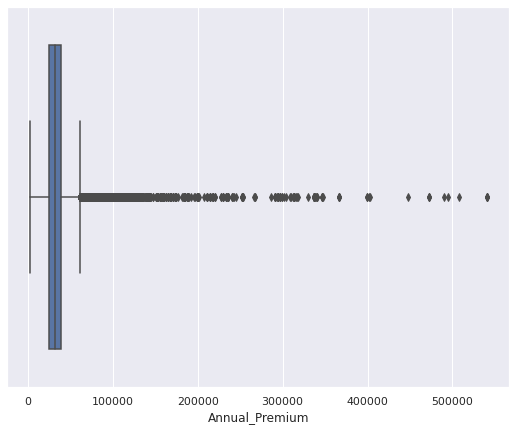

In [ ]:
plt.figure(figsize = (9,7))
sns.boxplot(data = df , x = 'Annual_Premium')
plt.show()

##### 1. Why did you pick the specific chart?

- **Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers..**


##### 2. What is/are the insight(s) found from the chart?

- **As we can clearly see that there are outliers present in the Annual Premium column so we will remove them in the feature engineering section.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

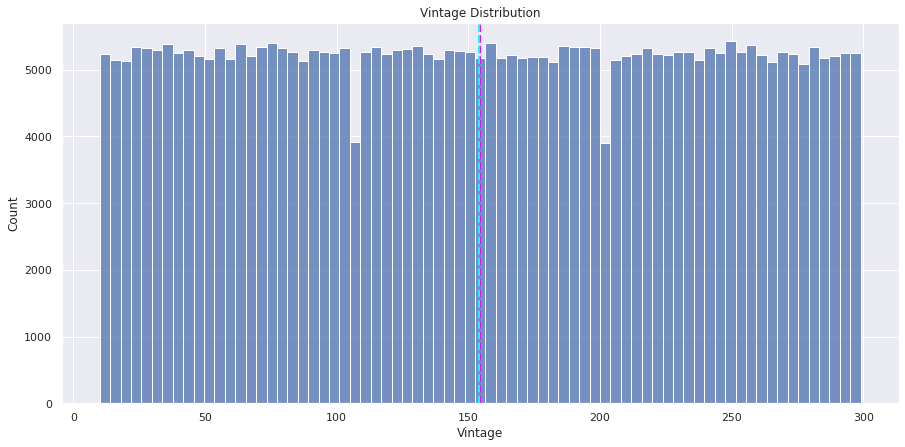

In [ ]:
fig = plt.figure(figsize = (15,7))
ax = fig.gca()
ax.axvline(df['Vintage'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Vintage'].median(), color='cyan', linestyle='dashed', linewidth=2)
sns.histplot(data = df , x = 'Vintage')
plt.title('Vintage Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

- **A histogram is an excellent tool for visualizing and understanding the probabilistic distribution of numerical data or image data that is intuitively understood by almost everyone. Python has a lot of different options for building and plotting histograms.**


##### 2. What is/are the insight(s) found from the chart?

- **From the histogram we can see that the distribution nearly uniform.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

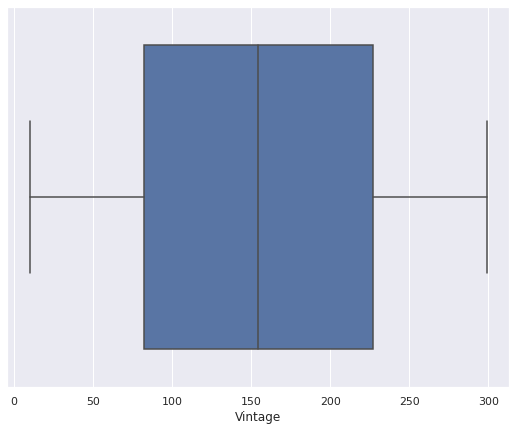

In [ ]:
plt.figure(figsize = (9,7))
sns.boxplot(data = df , x = 'Vintage')
plt.show()

##### 1. Why did you pick the specific chart?

- **Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers..**


##### 2. What is/are the insight(s) found from the chart?

- **As we can clearly see that there are no outliers present in the vintage column.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [ ]:
#Finding out the values of 1st and 3rd quantile
q1 = df['Annual_Premium'].quantile(0.25)
q3 = df['Annual_Premium'].quantile(0.75)
median = df['Annual_Premium'].quantile(0.5)

print(f'The q1, q3 and median values are {q1},{q3},{median} resp.')

#Finding out the interquantile range
iqr = q3 - q1
print(f'The iqr value is {iqr}')

#FInding out the upper and lower fence values
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
print(f'The upper and lower fence values are {upper} and {lower} resp.')

The q1, q3 and median values are 24405.0,39400.0,31669.0 resp.
The iqr value is 14995.0
The upper and lower fence values are 61892.5 and 1912.5 resp.


In [ ]:
#We will keep the rows with values within Lower and Upper fence by using loc function
df = df.loc[(df['Annual_Premium'] <= upper) &
        (df['Annual_Premium'] >= lower)]

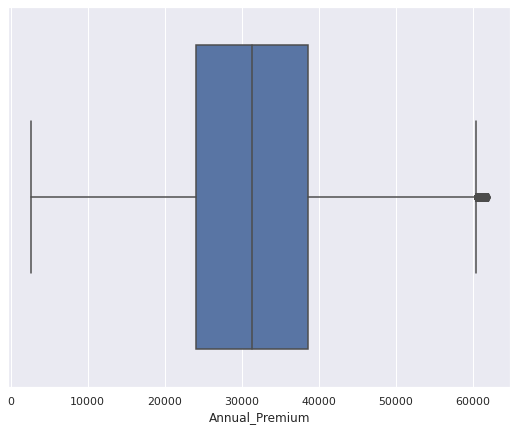

In [ ]:
#Plotting the Annual_Premium column after removing otliers
plt.figure(figsize = (9,7))
sns.boxplot(data = df , x = 'Annual_Premium')
plt.show()

### 2. Changing DataTypes

In [ ]:
df["Gender"] =df["Gender"].replace({"Male":1, "Female":0})
df["Vehicle_Damage"] =df["Vehicle_Damage"].replace({"Yes":1, "No":0})
df["Vehicle_Age"] =df["Vehicle_Age"].replace({"< 1 Year":0, "1-2 Year":1,"> 2 Years":2})

In [ ]:
#Change the int64 column into catagory column
cols=['Gender','Vehicle_Damage','Vehicle_Age']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Gender              370789 non-null  category
 1   Age                 370789 non-null  int64   
 2   Driving_License     370789 non-null  int64   
 3   Previously_Insured  370789 non-null  int64   
 4   Vehicle_Age         370789 non-null  category
 5   Vehicle_Damage      370789 non-null  category
 6   Annual_Premium      370789 non-null  float64 
 7   Vintage             370789 non-null  int64   
 8   Response            370789 non-null  int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 20.9 MB


### 3. Dropping Columns

**From the EDA, we can see that the Driving_License column is very imbalanced and it'll not affect the output feature much so we will drop it and the vintage column is also showing uniform distribution so we will drop that column too.**

In [ ]:
df.drop(['Driving_License', 'Vintage'], axis = 1, inplace = True)

In [ ]:
# one hot encoding for categorical data
df_copy = pd.get_dummies(df , columns=['Vehicle_Age', 'Vehicle_Damage', 'Gender' ])  
df_copy.head()

Age  Previously_Insured  Annual_Premium  Response  Vehicle_Age_0  \
0   44                   0         40454.0         1              0   
1   76                   0         33536.0         0              0   
2   47                   0         38294.0         1              0   
3   21                   1         28619.0         0              1   
4   29                   1         27496.0         0              1   

   Vehicle_Age_1  Vehicle_Age_2  Vehicle_Damage_0  Vehicle_Damage_1  Gender_0  \
0              0              1                 0                 1         0   
1              1              0                 1                 0         0   
2              0              1                 0                 1         0   
3              0              0                 1                 0         0   
4              0              0                 1                 0         1   

   Gender_1  
0         1  
1         1  
2         1  
3         1  
4         0

### 4. Data Re-Sampling

**As we know, our ouput column is quite imbalanced. So we need to apply sampling techniques to counter this situation.
So there are certain techniques for data re-sampling namely such as oversampling and undersamplimng. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).
Despite the advantage of balancing classes, these techniques also have their own weaknesses.**

**The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.**

**In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
There is also one technique which will be going to use called as Synthetic Minority Oversampling Technique (SMOTE). 
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors**

**SMOTE algorithm works in 4 simple steps:**
- Choose a minority class as the input vector
- Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
- Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
- Repeat the steps until data is balanced.

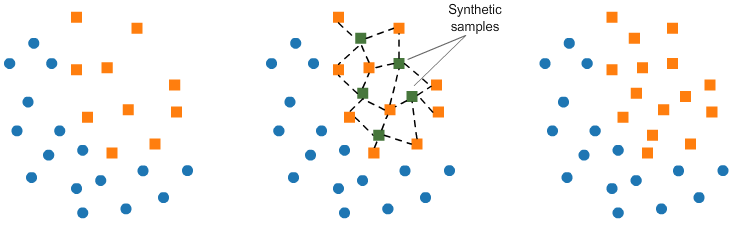

In [ ]:
df_copy.head()

Age  Previously_Insured  Annual_Premium  Response  Vehicle_Age_0  \
0   44                   0         40454.0         1              0   
1   76                   0         33536.0         0              0   
2   47                   0         38294.0         1              0   
3   21                   1         28619.0         0              1   
4   29                   1         27496.0         0              1   

   Vehicle_Age_1  Vehicle_Age_2  Vehicle_Damage_0  Vehicle_Damage_1  Gender_0  \
0              0              1                 0                 1         0   
1              1              0                 1                 0         0   
2              0              1                 0                 1         0   
3              0              0                 1                 0         0   
4              0              0                 1                 0         1   

   Gender_1  
0         1  
1         1  
2         1  
3         1  
4         0

In [ ]:
#Splitting independent and dependent variables
x = df_copy.drop(['Response'], axis =1)
y = df_copy['Response']

In [ ]:
smt = SMOTE(sampling_strategy= 0.8, random_state = None , k_neighbors= 5)
x_sampled,y_sampled = smt.fit_resample(x,y)
y_sampled.value_counts()

0    325634
1    260507
Name: Response, dtype: int64

**As we can see after resampling the number of instances in the data is increased and also the imbalance is also removed successfully with the help of SMOTE techniqe.**

### 5. Data Splitting

In [ ]:
#Splitting the dataset into train and test dataset (Using new resampled data)
X_train,X_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size = 0.20, random_state = 2,stratify=y_sampled)
print(X_train.shape)
print(X_test.shape)

(468912, 10)
(117229, 10)


In [ ]:
#Let's take a look at training dataset
X_train.head()

Age  Previously_Insured  Annual_Premium  Vehicle_Age_0  Vehicle_Age_1  \
429505   52                   0    28671.721662              0              0   
194186   24                   1    25839.000000              1              0   
569278   24                   0    28274.866098              0              0   
137922   33                   0     2630.000000              0              1   
156039   55                   0    46222.000000              0              1   

        Vehicle_Age_2  Vehicle_Damage_0  Vehicle_Damage_1  Gender_0  Gender_1  
429505              0                 0                 1         0         0  
194186              0                 1                 0         1         0  
569278              0                 0                 1         1         0  
137922              0                 0                 1         0         1  
156039              0                 0                 1         0         1

In [ ]:
#Let's take a look at testing dataset
X_test.head()

Age  Previously_Insured  Annual_Premium  Vehicle_Age_0  Vehicle_Age_1  \
451027   38                   0    27565.582238              0              1   
248986   49                   1    37090.000000              0              1   
538784   36                   0    32432.908891              0              1   
447727   38                   0    33840.514701              0              1   
197256   50                   1     2630.000000              0              1   

        Vehicle_Age_2  Vehicle_Damage_0  Vehicle_Damage_1  Gender_0  Gender_1  
451027              0                 0                 1         0         1  
248986              0                 1                 0         1         0  
538784              0                 0                 1         0         0  
447727              0                 0                 1         0         0  
197256              0                 0                 1         0         1

In [ ]:
len(y_test)

117229

## ***5. ML Model Implementation***

### Logistic Regarssion 

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_train = logistic.predict(X_train)
y_pred_test = logistic.predict(X_test)

In [ ]:
#Training  Data Evaluation for Logistic regression

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[184884  75623]
 [ 25401 183004]]
********************************************************************************
Accuracy : 0.7845565905756304
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.79    260507
           1       0.71      0.88      0.78    208405

    accuracy                           0.78    468912
   macro avg       0.79      0.79      0.78    468912
weighted avg       0.80      0.78      0.78    468912



In [ ]:
#Storing the accuracies of all algorithms for comparison and final conclusion
dict1 = {'Model' : 'Logistic Regression',
         'Accuracy' : round(accuracy,3)}
train_df = pd.DataFrame(dict1,index=[1])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**So, we are getting the accuracy as 79% for the training dataset, which is quite good, now let's see about the testing data.**

In [ ]:
#Testing Data Evaluation for Logistic regression

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[46086 19041]
 [ 6296 45806]]
Accuracy : 0.7838674730655384
classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.78     65127
           1       0.71      0.88      0.78     52102

    accuracy                           0.78    117229
   macro avg       0.79      0.79      0.78    117229
weighted avg       0.80      0.78      0.78    117229



**For testing dataset, we are getting accuracy as 78%, which is also a good value, but we will go for the hyperparameter tuning and cross validation to get the better idea.**

In [ ]:
#Storing the accuracies of all algorithms for comparison and final conclusion
dict2 = {'Model' : 'Logistic Regression',
         'Accuracy' : round(accuracy,2)}
test_df = pd.DataFrame(dict1,index=[1])

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param = [{'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
logi = LogisticRegression()
logi_classifier = GridSearchCV(logi,param, scoring = 'accuracy' , cv = 3)
logi_classifier.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             scoring='accuracy')

In [ ]:
print('The best parameters for logistic regression after hyperparameter tuning and cross-validation are : \n',logi_classifier.best_params_)

The best parameters for logistic regression after hyperparameter tuning and cross-validation are : 
 {'C': 0.001}


In [ ]:
y_pred_train_log = logi_classifier.predict(X_train)
y_pred_test_log = logi_classifier.predict(X_test)

In [ ]:
#Training  Data Evaluation for Logistic regression

cnf_matrix = confusion_matrix(y_train,y_pred_train_log)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_pred_train_log)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_pred_train_log)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[184305  76202]
 [ 23098 185307]]
********************************************************************************
Accuracy : 0.7882331866107073
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79    260507
           1       0.71      0.89      0.79    208405

    accuracy                           0.79    468912
   macro avg       0.80      0.80      0.79    468912
weighted avg       0.81      0.79      0.79    468912



**Here after performing hyperparameter tuning we can se that there is no improvement in the results for train data. The accuracy is still 78% for train data.**

In [ ]:
#Testing Data Evaluation for Logistic regression

cnf_matrix = confusion_matrix(y_test,y_pred_test_log)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_log)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_log)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[45947 19180]
 [ 5718 46384]]
Accuracy : 0.7876122802378251
classification Report:
               precision    recall  f1-score   support

           0       0.89      0.71      0.79     65127
           1       0.71      0.89      0.79     52102

    accuracy                           0.79    117229
   macro avg       0.80      0.80      0.79    117229
weighted avg       0.81      0.79      0.79    117229



**For test data also the accuracy hasn't changed. The accuracy after hyperparameter tuning for test data is still 78%.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement after doing hyperparameter tuning and cross validation.

### Decision Tree 

In [ ]:
#Let's fit the data into the model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#Let's do the prediction on test and train data
y_train_pred_dt = dt_classifier.predict(X_train)
y_pred_test_dt = dt_classifier.predict(X_test)

In [ ]:
#Training  Data Evaluation for Decision tree without Hyperparameter Tunning

cnf_matrix = confusion_matrix(y_train,y_train_pred_dt)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_train_pred_dt)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_train_pred_dt)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[243473  17034]
 [  5071 203334]]
********************************************************************************
Accuracy : 0.9528589586105709
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96    260507
           1       0.92      0.98      0.95    208405

    accuracy                           0.95    468912
   macro avg       0.95      0.96      0.95    468912
weighted avg       0.95      0.95      0.95    468912



In [ ]:
#Storing the accuracies of all algorithms for comparison and final conclusion
dict1 = {'Model' : 'Decision Tree',
         'Accuracy' : round(accuracy,2)}
train_df = train_df.append(dict1,ignore_index = True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**We are getting accuracy for decision tree model as 95% for train dataset which is quite good.We will also perform hyperparameter tuning and cross validation to find whether we get better results or not.**

In [ ]:
#Testing Data Evaluation for Decision tree without Hyperparameter Tunning

cnf_matrix = confusion_matrix(y_test,y_pred_test_dt)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_dt)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_dt)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[53830 11297]
 [ 6504 45598]]
Accuracy : 0.8481519078043829
classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86     65127
           1       0.80      0.88      0.84     52102

    accuracy                           0.85    117229
   macro avg       0.85      0.85      0.85    117229
weighted avg       0.85      0.85      0.85    117229



**For test data we are getting accuracy as 85% which is less compared to train result. There might be some overfitting issues which we will try to solve using hyperparameter tuning and cross validation.**

In [ ]:
dict2 = {'Model' : 'Decision Tree',
         'Accuracy' : round(accuracy,2)}
test_df = test_df.append(dict2,ignore_index = True)

### Hyperparameter Tunning and cross-validation.

In [ ]:
param = {'criterion' : ['gini','entropy'],
         'splitter' : ['best','random'],
         'max_depth' : np.arange(2,12),
         'min_samples_split': np.arange(2,24),
         'min_samples_leaf' : np.arange(2,24)}
dt_model = DecisionTreeClassifier()
RSCV_dt = RandomizedSearchCV(dt_model,param,scoring='accuracy', cv = 3)
RSCV_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23]),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [ ]:
print('The best parameters for logistic regression after hyperparameter tuning and cross-validation are : \n',RSCV_dt.best_estimator_)

The best parameters for logistic regression after hyperparameter tuning and cross-validation are : 
 DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=18,
                       min_samples_split=5)


In [ ]:
y_train_pred_dt1 = RSCV_dt.predict(X_train)
y_pred_test_dt2 = RSCV_dt.predict(X_test)

In [ ]:
#Training Data evaluation after Hyperparameter Tuning

cnf_matrix = confusion_matrix(y_train,y_train_pred_dt1)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_train_pred_dt1)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_train_pred_dt1)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[207280  53227]
 [ 30276 178129]]
Accuracy : 0.8219218104889617
classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83    260507
           1       0.77      0.85      0.81    208405

    accuracy                           0.82    468912
   macro avg       0.82      0.83      0.82    468912
weighted avg       0.83      0.82      0.82    468912



**The accuracy after hyperparameter tuning and cross validation is 82% for the training dataset, which is less as compared to the accuracy we were getting without hyperparameter tuning and cross-validaton. So, we can say that it helped us to tackle the overfitting condition.**

In [ ]:
#Testing Data evaluation after Hyperparameter Tuning

cnf_matrix = confusion_matrix(y_test,y_pred_test_dt2)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_dt2)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_dt2)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[51684 13443]
 [ 7546 44556]]
Accuracy : 0.8209572716648611
classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83     65127
           1       0.77      0.86      0.81     52102

    accuracy                           0.82    117229
   macro avg       0.82      0.82      0.82    117229
weighted avg       0.83      0.82      0.82    117229



**The acccuracies before and after hyperparameter tuning is quite closed which are 85% and 82% respectively. So there is not much significant improvement after performing after hyperparameter tuning and cross validation.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement after doing hyperparameter tuning and cross validation.

### Random Forest 

In [ ]:
#Let's fit the model
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Let's perform predictions
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

In [ ]:
#Training Data Evaluation without hyperparameter tunning

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_pred_train_rf)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_pred_train_rf)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[242895  17612]
 [  4523 203882]]
********************************************************************************
Accuracy : 0.9527949807213294
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96    260507
           1       0.92      0.98      0.95    208405

    accuracy                           0.95    468912
   macro avg       0.95      0.96      0.95    468912
weighted avg       0.95      0.95      0.95    468912



In [ ]:
#Storing the accuracies of all algorithms for comparison and final conclusion
dict1 = {'Model' : 'Random Forest',
         'Accuracy' : round(accuracy,2)}
train_df = train_df.append(dict1,ignore_index = True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**The accuracy for the training dataset with Random forest classifier is nearly about 95% which is very good value. But we will perform cross-validation and hyperparameter tuning to get the idea about the improvement and also about overfitting condition.**

In [ ]:
#Testing Data Evaluation without hyperparameter tunning

cnf_matrix = confusion_matrix(y_test,y_pred_test_rf)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_rf)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_rf)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[53130 11997]
 [ 6920 45182]]
Accuracy : 0.8386320790930571
classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85     65127
           1       0.79      0.87      0.83     52102

    accuracy                           0.84    117229
   macro avg       0.84      0.84      0.84    117229
weighted avg       0.84      0.84      0.84    117229



**For testing data it's giving us accuracy of 83% which is also a good value. Let's perform hyperparameter tuning and cross validation for better understanding.**

In [ ]:
dict2 = {'Model' : 'Random Forest',
         'Accuracy' : round(accuracy,2)}
test_df = test_df.append(dict2,ignore_index = True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
hyperparameters = {'n_estimators':np.arange(10,100),
                    'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),  
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'random_state':[11],
                    'oob_score':[True],
                    'max_features':['auto']}
rf_model = RandomForestClassifier()
RSCV_rf_model = RandomizedSearchCV(rf_model,hyperparameters,scoring ='accuracy', cv = 3)
RSCV_rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                      

In [ ]:
print('The best parameters for logistic regression after hyperparameter tuning and cross-validation are : \n',RSCV_rf_model.best_estimator_)

The best parameters for logistic regression after hyperparameter tuning and cross-validation are : 
 RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=67, oob_score=True, random_state=11)


In [ ]:
y_train_pred_rf1 = RSCV_rf_model.predict(X_train)
y_pred_test_rf2 = RSCV_rf_model.predict(X_test)

In [ ]:
#Training Data Evaluation with hyperparameter tunning

cnf_matrix = confusion_matrix(y_train,y_train_pred_rf1)
print("Confusion Matrix :\n",cnf_matrix)


accuracy = accuracy_score(y_train,y_train_pred_rf1)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_train_pred_rf1)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[192370  68137]
 [ 17494 190911]]
Accuracy : 0.8173836455454329
classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82    260507
           1       0.74      0.92      0.82    208405

    accuracy                           0.82    468912
   macro avg       0.83      0.83      0.82    468912
weighted avg       0.84      0.82      0.82    468912



**As we can see, the accuracy reduced to 85% after performing cross validation and hyperparameter tuning. So it helped us to tackle the overfitting.**

In [ ]:
#Testing Data Evaluation with hyperparameter tunning

cnf_matrix = confusion_matrix(y_test,y_pred_test_rf2)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_rf2)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_rf2)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[47965 17162]
 [ 4350 47752]]
Accuracy : 0.8164959182454853
classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82     65127
           1       0.74      0.92      0.82     52102

    accuracy                           0.82    117229
   macro avg       0.83      0.83      0.82    117229
weighted avg       0.84      0.82      0.82    117229



**The accuracy for the test dataset is incresed to 85% after performing hyperparameter tuning and cross validation.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is improvement after hyperparameter tuning and cross-validation. We got rid of overfitting condition and also our test accuracy is incresed by 2%.

#### **Model Explainability - Feature Importance.**

In [ ]:
x.columns

Index(['Age', 'Previously_Insured', 'Annual_Premium', 'Vehicle_Age_0',
       'Vehicle_Age_1', 'Vehicle_Age_2', 'Vehicle_Damage_0',
       'Vehicle_Damage_1', 'Gender_0', 'Gender_1'],
      dtype='object')

In [ ]:
random_forest.feature_importances_

array([0.05987268, 0.12640929, 0.36641788, 0.05516266, 0.02239857,
       0.01460982, 0.15768539, 0.10496521, 0.0456104 , 0.04686809])

In [ ]:
s1 = pd.Series(random_forest.feature_importances_,index = x.columns)
s1.sort_values()*100

Vehicle_Age_2          1.460982
Vehicle_Age_1          2.239857
Gender_0               4.561040
Gender_1               4.686809
Vehicle_Age_0          5.516266
Age                    5.987268
Vehicle_Damage_1      10.496521
Previously_Insured    12.640929
Vehicle_Damage_0      15.768539
Annual_Premium        36.641788
dtype: float64

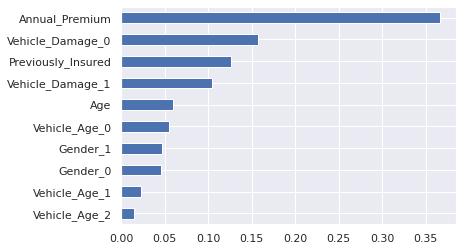

In [ ]:
s1.sort_values().plot(kind = "barh")

### AdaBoost Classifier

In [ ]:
#let's fit the model
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
#let's do the prediction
y_pred_train_ada = ada_clf.predict(X_train)
y_pred_test_ada = ada_clf.predict(X_test)

In [ ]:
#Training Data Evaluation without hyperparameter


cnf_matrix = confusion_matrix(y_train,y_pred_train_ada)
print("Confusion Matrix :\n",cnf_matrix)


accuracy = accuracy_score(y_train,y_pred_train_ada)
print("Accuracy:",accuracy)


clf_report = classification_report(y_train,y_pred_train_ada)
print('classification_report',clf_report)

Confusion Matrix :
 [[198321  62186]
 [ 22931 185474]]
Accuracy: 0.8184798000477702
classification_report               precision    recall  f1-score   support

           0       0.90      0.76      0.82    260507
           1       0.75      0.89      0.81    208405

    accuracy                           0.82    468912
   macro avg       0.82      0.83      0.82    468912
weighted avg       0.83      0.82      0.82    468912



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**The accuracy we are getting for training dataset is 81% using AdaBoostClasifier, which is less as compared to previous algorithms, so we will perform hyperparameter tuning and cross validation to see whether there is scope of improvement or not.**

In [ ]:
#Storing the accuracies of all algorithms for comparison and final conclusion
dict1 = {'Model' : 'Adaboost Classifier',
         'Accuracy' : round(accuracy,2)}
train_df = train_df.append(dict1,ignore_index = True)

In [ ]:
#Testing Data Evaluation without hyperparameter

cnf_matrix = confusion_matrix(y_test,y_pred_test_ada)
print("Confusion Matrix :\n",cnf_matrix)


accuracy = accuracy_score(y_test,y_pred_test_ada)
print("Accuracy:",accuracy)


clf_report = classification_report(y_test,y_pred_test_ada)
print('classification_report',clf_report)

Confusion Matrix :
 [[49415 15712]
 [ 5664 46438]]
Accuracy: 0.8176560407407724
classification_report               precision    recall  f1-score   support

           0       0.90      0.76      0.82     65127
           1       0.75      0.89      0.81     52102

    accuracy                           0.82    117229
   macro avg       0.82      0.83      0.82    117229
weighted avg       0.83      0.82      0.82    117229



**The test data accuracy is same as train data i.e. 81%**

In [ ]:
dict2 = {'Model' : 'AdaBoost Classifier',
         'Accuracy' : round(accuracy,2)}
test_df = test_df.append(dict2,ignore_index = True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
params = {'n_estimators':np.arange(10,100),
                    'learning_rate':np.arange(0,2,0.001)}
ada_model = AdaBoostClassifier()
RSCV_ada_cf = RandomizedSearchCV(ada_model,params,cv=5)
RSCV_ada_cf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [ ]:
print('The best parameters for logistic regression after hyperparameter tuning and cross-validation are : \n',RSCV_ada_cf.best_estimator_)

The best parameters for logistic regression after hyperparameter tuning and cross-validation are : 
 AdaBoostClassifier(learning_rate=1.3980000000000001, n_estimators=96)


In [ ]:
y_pred_train_ada1 = RSCV_ada_cf.predict(X_train)
y_pred_test_ada2 = RSCV_ada_cf.predict(X_test)

In [ ]:
#Training Data Evaluation with hyperparameter tunning

cnf_matrix = confusion_matrix(y_train,y_pred_train_ada1)
print("Confusion Matrix :\n",cnf_matrix)


accuracy = accuracy_score(y_train,y_pred_train_ada1)
print("Accuracy:",accuracy)

clf_report = classification_report(y_train,y_pred_train_ada1)
print('classification_report',clf_report)

Confusion Matrix :
 [[205364  55143]
 [ 28345 180060]]
Accuracy: 0.8219537994335824
classification_report               precision    recall  f1-score   support

           0       0.88      0.79      0.83    260507
           1       0.77      0.86      0.81    208405

    accuracy                           0.82    468912
   macro avg       0.82      0.83      0.82    468912
weighted avg       0.83      0.82      0.82    468912



In [ ]:
#Testing Data Evaluation with hyperparameter tunning

cnf_matrix = confusion_matrix(y_test,y_pred_test_ada2)
print("Confusion Matrix :\n",cnf_matrix)


accuracy = accuracy_score(y_test,y_pred_test_ada2)
print("Accuracy:",accuracy)


clf_report = classification_report(y_test,y_pred_test_ada2)
print('classification_report',clf_report)

Confusion Matrix :
 [[51240 13887]
 [ 7034 45068]]
Accuracy: 0.8215373329125046
classification_report               precision    recall  f1-score   support

           0       0.88      0.79      0.83     65127
           1       0.76      0.86      0.81     52102

    accuracy                           0.82    117229
   macro avg       0.82      0.83      0.82    117229
weighted avg       0.83      0.82      0.82    117229



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement after doing hyperparameter tuning and cross validation.

#**CONCLUSION**

During our analysis we performed EDA on our data. We have analyzed both numerical as well as categorical columns / features. After performing EDA we got to know that 'Annual_Premium' column have outliers, so, in feature engineering we removed the outliers with the help of IQR method. Also out output column had imbalanced data. So to tackle that thing we performed data-resampling using SMOTE technique.
Next we implemented 4 Machine Learning Models and also performed hyperparameter tuning and cross validation for each method. Following are the results of the models :-

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([train_df,test_df],keys=['Training set','Test set'])
result

Model  Accuracy
Training set 0  Logistic Regression     0.785
             1        Decision Tree     0.950
             2        Random Forest     0.950
             3  Adaboost Classifier     0.820
Test set     0  Logistic Regression     0.785
             1        Decision Tree     0.850
             2        Random Forest     0.840
             3  AdaBoost Classifier     0.820

- There was overfitting issues while using Random forest method. We tackled that with hyperparameter tuning. 
- Annual Premium column has the highest importance among all the features. 
- We are getting 85% accuracy for both test and train dataset while using Random Forest model with hyperparameter tuning.
- Hence, we can deploy this model. 